<a href="https://colab.research.google.com/github/abishekvp-prog/CUSTOMER_SEGMENTATION/blob/main/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
df=pd.read_csv('Mall_Customers.csv')

In [7]:
print(df.head())
df.info()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.columns = df.columns.str.strip()
df.rename(columns={'Spending Score (1-100)  ': 'Spending Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
X=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [13]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [14]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

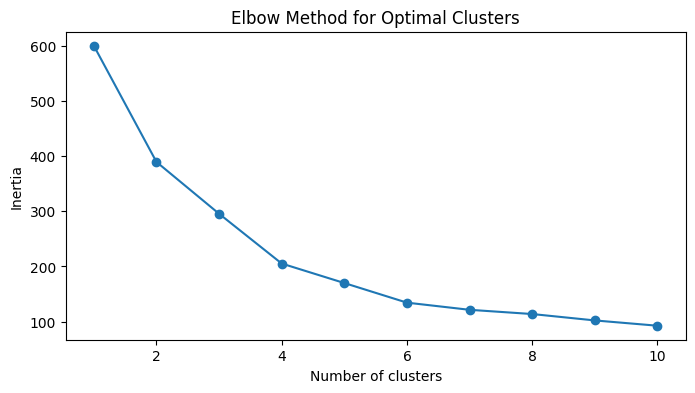

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [38]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [39]:
df['Cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Customer Segments')

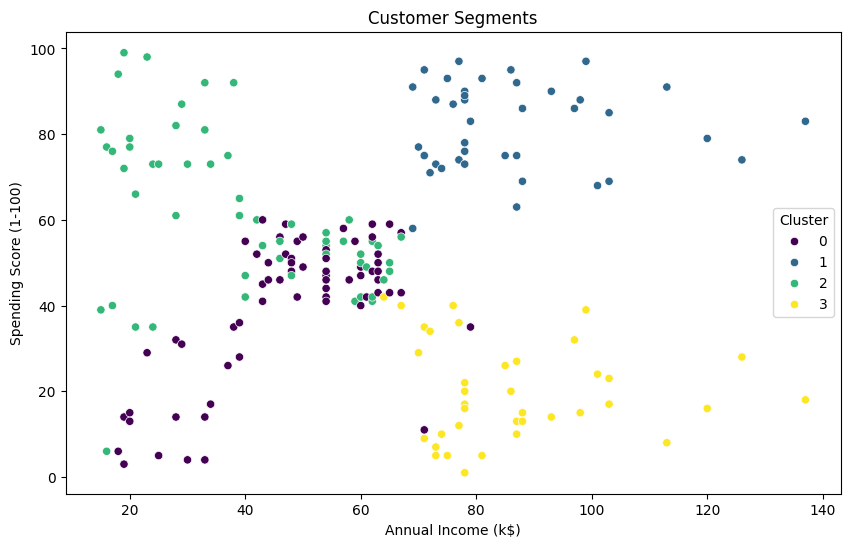

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')



### Insights from the Cluster Graph:

1. **Distinct Customer Groups**: The graph shows four distinct clusters (labeled 0, 1, 2, and 3) based on spending scores and annual income. Each cluster represents a different customer segment, indicating varying purchasing behaviors and preferences.

2. **High Spending Score and Low Income** (Cluster 0 - Purple):
   - This cluster appears to have customers with lower annual incomes but high spending scores. This might indicate that these customers are willing to spend a significant portion of their income on particular products or services.
   - Targeting these customers with promotional offers or loyalty programs could enhance engagement and sales.

3. **Moderate Spending with Moderate Income** (Cluster 1 - Dark Purple):
   - Customers in this cluster have a moderate spending score and income. This group likely represents typical consumers who balance their spending with their earnings.
   - Marketing strategies focusing on value and quality can resonate well with this segment.

4. **High Income but Low Spending** (Cluster 2 - Cyan):
   - This segment has high annual incomes but relatively low spending scores. These customers may have a more conservative approach to spending, possibly indicating a need for more targeted marketing or premium offerings that demonstrate value.
   - It's essential to understand what motivates their spending and how to encourage higher purchases.

5. **High Spending and High Income** (Cluster 3 - Yellow):
   - Customers in this cluster represent the affluent demographic who spend significantly. This group is critical for luxury products and high-value services.
   - Tailored marketing efforts such as exclusive offers, premium services, or loyalty programs could be beneficial for engaging this group effectively.

### Additional Observations:

- **Outliers**: Depending on the distribution of points, you may notice a few outliers in any cluster, especially in Cluster 2, where customers with high income but low spending scores may indicate missed opportunities.
  
- **Potential Growth Opportunities**: The area where low-income customers (Cluster 0) and high-income customers (Cluster 3) overlap suggests a potential for cross-segment marketing strategies. For example, promoting entry-level products to high-income segments might stimulate spending without diluting premium offerings.

- **Targeted Marketing**: Different clusters imply the necessity for customized marketing strategies for each segment. It is essential to analyze the preferences, needs, and behaviors of customers in each cluster to craft effective marketing campaigns.



In [41]:
def predict_customer_segment(age, income, spending_score, df, scaler):

    new_data = pd.DataFrame([[age, income, spending_score]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])


    new_data_scaled = scaler.transform(new_data)


    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(scaler.transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]))  # Fit on scaled original data


    cluster = kmeans.predict(new_data_scaled)

    return cluster[0]

In [42]:
new_customer_age = 35
new_customer_income = 60  # in thousands of dollars
new_customer_spending_score = 15

predicted_cluster = predict_customer_segment(new_customer_age, new_customer_income, new_customer_spending_score, df, scaler)
print(f"The new customer belongs to cluster: {predicted_cluster}")

The new customer belongs to cluster: 3
